In [1]:
#===========================================#
#=== Linux OS running OK                 ===#
#=== Test iMac OS OK (needs modify path) ===#
#===========================================#
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [3]:
# § 代碼清單 5-1 實例化一個小型的卷積神經網路

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


2023-10-07 19:02:11.901572: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-10-07 19:02:11.901905: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 19:02:11.903897: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# § 代碼清單 5-2 在卷積神經網路上添加分類器

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [7]:
# § 代碼清單 5-3 在MNIST圖像上訓練卷積神經網路

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


2023-10-07 19:02:23.175303: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-10-07 19:02:23.175708: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3392155000 Hz


Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.4215 - accuracy: 0.8628
Epoch 2/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0516 - accuracy: 0.9834
Epoch 3/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0313 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 37s 40ms/step - loss: 0.0255 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0178 - accuracy: 0.9943


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss= ", test_loss, "acc= ", test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.0244 - accuracy: 0.9923
loss=  0.024419525638222694 acc=  0.9922999739646912


In [74]:
# FOR TEST os
#os.path
#print(os.path.isdir(original_dataset_dir))
#print(original_dataset_dir)

fnames = ['{}.jpg'.format(i) for i in range(10)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    print(src, dst)
    shutil.copyfile(src, dst)


/home/earvin/workspaces/datasets/kaggle_original_data/Cat/0.jpg /home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats/0.jpg
/home/earvin/workspaces/datasets/kaggle_original_data/Cat/1.jpg /home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats/1.jpg
/home/earvin/workspaces/datasets/kaggle_original_data/Cat/2.jpg /home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats/2.jpg
/home/earvin/workspaces/datasets/kaggle_original_data/Cat/3.jpg /home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats/3.jpg
/home/earvin/workspaces/datasets/kaggle_original_data/Cat/4.jpg /home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats/4.jpg
/home/earvin/workspaces/datasets/kaggle_original_data/Cat/5.jpg /home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats/5.jpg
/home/earvin/workspaces/datasets/kaggle_original_data/Cat/6.jpg /home/earvin/workspaces/datasets/cats_and_dogs_small/train/cats/6.jpg
/home/earvin/workspaces/datasets/kaggle_original_data/Cat/7.jp

In [9]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 (要依執行平台修正相對應的路徑)

import os, shutil

#--- FOR Linux Settings ---#
original_dataset_dir = '/home/earvin/workspaces/datasets/kaggle_original_data'
base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small'
#--- FOR iMac Settings ---#
#original_dataset_dir = '/Users/earvin/workspaces/datasets/kaggle_original_data'
#base_dir = '/Users/earvin/workspaces/datasets/cats_and_dogs_small'

if not os.path.isdir(base_dir):
    os.mkdir(base_dir)
    # 分別對應劃分後的訓練、驗證和測試的目錄
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)

    # 貓、狗的訓練圖像目錄
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)

    # 貓、狗的驗證圖像目錄
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)

    # 貓、狗的測試圖像目錄
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)


In [10]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 : 複製檔案 (要依執行平台修正相對應的路徑)

# Cats
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Dogs
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [11]:
# check copy status

print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))


total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [12]:
# § 代碼清單 5-5 將貓狗分類的小型卷積神經網路實例化

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [14]:
# § 代碼清單 5-6 配置模型用於訓練

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [15]:
# § 代碼清單 5-7 使用ImageDataGenerator從目錄中讀取圖像

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
#=== FOR TEST ===#
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
# § 代碼清單 5-8 利用批量生成器儗合模型

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

"""
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
"""

/home/earvin/anaconda3/envs/tf2/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 80s 789ms/step - loss: 0.6968 - acc: 0.5076 - val_loss: 0.6624 - val_acc: 0.6200
Epoch 2/30
100/100 [==============================] - 76s 761ms/step - loss: 0.6573 - acc: 0.6124 - val_loss: 0.6314 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 76s 763ms/step - loss: 0.6077 - acc: 0.6824 - val_loss: 0.5988 - val_acc: 0.6790
Epoch 4/30
100/100 [==============================] - 74s 738ms/step - loss: 0.5672 - acc: 0.7017 - val_loss: 0.6380 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 76s 756ms/step - loss: 0.5338 - acc: 0.7389 - val_loss: 0.5778 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 76s 756ms/step - loss: 0.4977 - acc: 0.7667 - val_loss: 0.6517 - val_acc: 0.6360
Epoch 7/30
100/100 [==============================] - 78s 782ms/step - loss: 0.4498 - acc: 0.8043 - val_loss: 0.5675 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 7

'\nhistory = model.fit_generator(\n    train_generator,\n    steps_per_epoch=100,\n    epochs=30,\n    validation_data=validation_generator,\n    validation_steps=50)\n'

In [18]:
# § 代碼清單 5-9 保存模型

model.save('cats_and_dogs_small_1.h5')


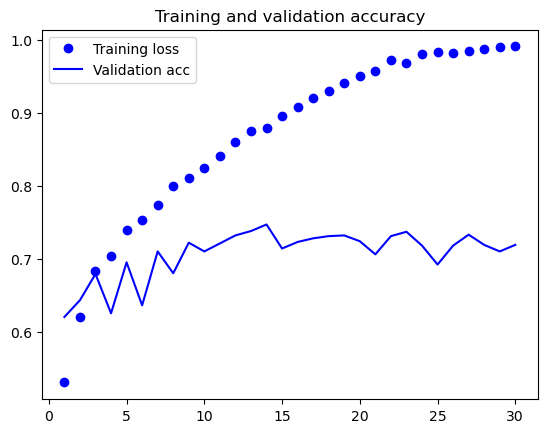

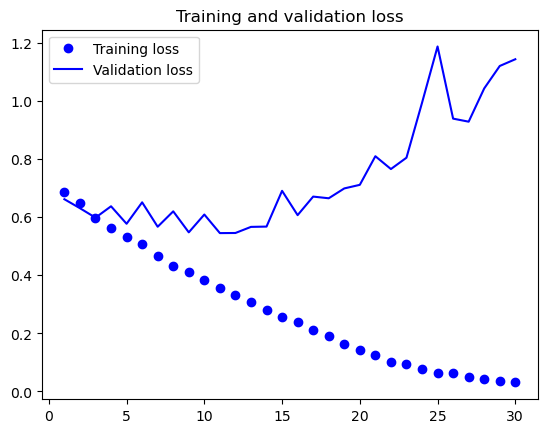

In [19]:
# § 代碼清單 5-10 繪製訓練過程中的損失曲線和精度曲線

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [20]:
#--- TEST h5 document --
import h5py

f = h5py.File('/home/earvin/workspaces/GithubProjects/tensorflow/scripts/cats_and_dogs_small_1.h5','r')
f.keys() #可以查看所有的主键
print([key for key in f.keys()])

['model_weights', 'optimizer_weights']


In [21]:
from keras.models import load_model

# 刪除既有模型變數
#del model 

# 載入模型
model = load_model('cats_and_dogs_small_1.h5')